In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.

In [3]:
car_data=pd.read_csv("C:/Users/ASUS/Desktop/DATA SCIENCE/Assignments/Assignment 6/car_age_price.csv")
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Find the best linear relationship between year and price.

<function matplotlib.pyplot.show(close=None, block=None)>

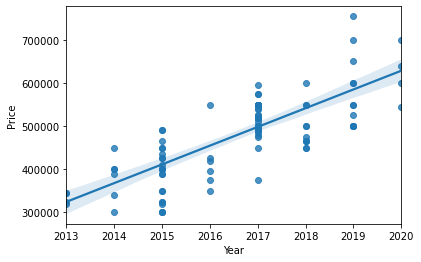

In [5]:
sns.regplot(x = "Year", y = "Price", data = car_data)
plt.show

In [6]:
car_data.isna().sum()

Year     0
Price    0
dtype: int64

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
cor_matrix=car_data.corr()

<AxesSubplot:>

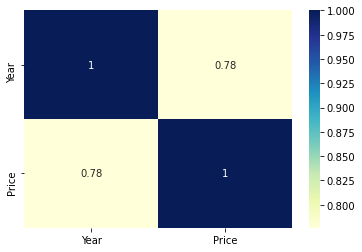

In [10]:
sns.heatmap(cor_matrix,annot=True,cmap='YlGnBu')

### Can you predict the possible price of a 2022 model second-hand grand i10?

In [13]:
### Traget column is Price, Therfore we are splitting data to dependant and independant variable

In [24]:
y=car_data['Price']
x=car_data.drop(['Price'],axis=1)

In [25]:
print('Shape of X:',x.shape)
print('Shape of Y:',y.shape)

Shape of X: (112, 1)
Shape of Y: (112,)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [27]:
print('Shape of x_train shape',x_train.shape)
print('Shape of x_test shape',x_test.shape)
print('Shape of y_train shape',y_train.shape)
print('Shape of y_test shape',y_test.shape)

Shape of x_train shape (84, 1)
Shape of x_test shape (28, 1)
Shape of y_train shape (84,)
Shape of y_test shape (28,)


In [28]:
from sklearn.linear_model import LinearRegression
l_r=LinearRegression()
model=l_r.fit(x1_train,y_train)
predictions=model.predict(x1_test)

In [29]:
predictions

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE=:',mean_squared_error(y_test,predictions))
print('MAE=:',mean_absolute_error(y_test,predictions))
print('R Squared value',r2_score(y_test,predictions))

MSE=: 3878767151.073449
MAE=: 49985.62530006309
R Squared value 0.4347961632108023


In [31]:
model.predict([[2022]])

array([740160.11937766])

#### As years pass by the it is observed that price of the vehicle is also increasing in the above reg plot. As per the predictive model the car will yield value of almost 740160/- in  the year 2022 .

### Lasso Regression

In [32]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [33]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [36]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print('R Squared value',r2_score(y_test,y_pred1))

Mean squared error on test set 3878735896.2220917
R Squared value 0.4348007175862566


In [35]:
print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year          46978.616238


### On comparing R square value we infer that Lasso Regression is more correct than linear regression

### Thank You